In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.metrics import peak_signal_noise_ratio,structural_similarity
from skimage.util import random_noise

In [2]:
imageWidth = 181
imageHeight = 217
slicesCount = 10
patchWindowRadius = 2
searchWindowRadius = 5
imageData = np.fromfile("imageInput5X5X5Slices10.bin",dtype = np.float32, sep = '')
imageData = imageData / np.max(imageData)
gpuDenoisedImage = np.fromfile("gpu_output.bin", dtype = np.float32, sep = '')
gpuDenoisedImage /= np.max(gpuDenoisedImage)
pythonDenoisedImage = np.fromfile("python_output.bin", dtype = np.float32, sep = '')
pythonDenoisedImage /= np.max(pythonDenoisedImage)

In [3]:
psnrSckitImageDenoising = peak_signal_noise_ratio(imageData, gpuDenoisedImage)
print("PSNR for gpu image denoising for patch radius = " + str(patchWindowRadius) + " and search window radius = " + str(searchWindowRadius) + " is " + str(psnrSckitImageDenoising))

PSNR for gpu image denoising for patch radius = 2 and search window radius = 5 is 33.453880023141714


In [4]:
ssimSckitImageDenoising = structural_similarity(imageData, gpuDenoisedImage)
print("SSIM for gpu image denoising for patch radius = " + str(patchWindowRadius) + " and search window radius = " + str(searchWindowRadius) + " is " + str(ssimSckitImageDenoising))

SSIM for gpu image denoising for patch radius = 2 and search window radius = 5 is 0.9792377351941415


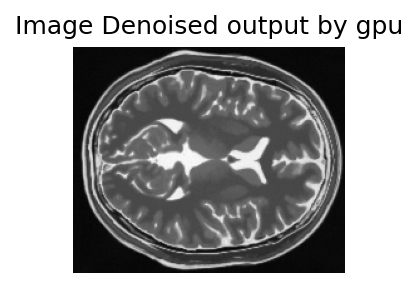

In [5]:
denoise = gpuDenoisedImage.reshape(slicesCount, imageHeight, imageWidth).T
fig = plt.figure(figsize = (3, 2), dpi = 150)
plt.axis('off')
plt.title('Image Denoised output by gpu')
plt.imshow(denoise[:, :, 0], cmap = 'gray')
plt.savefig('gpuImageDenoised.png')

In [6]:
psnrSckitImageDenoising = peak_signal_noise_ratio(imageData, pythonDenoisedImage)
print("PSNR for python image denoising for patch radius = " + str(patchWindowRadius) + " and search window radius = " + str(searchWindowRadius) + " is " + str(psnrSckitImageDenoising))

PSNR for python image denoising for patch radius = 2 and search window radius = 5 is 33.453880023141714


In [7]:
ssimSckitImageDenoising = structural_similarity(imageData, pythonDenoisedImage)
print("SSIM for python image denoising for patch radius = " + str(patchWindowRadius) + " and search window radius = " + str(searchWindowRadius) + " is " + str(ssimSckitImageDenoising))

SSIM for python image denoising for patch radius = 2 and search window radius = 5 is 0.9792377351941415


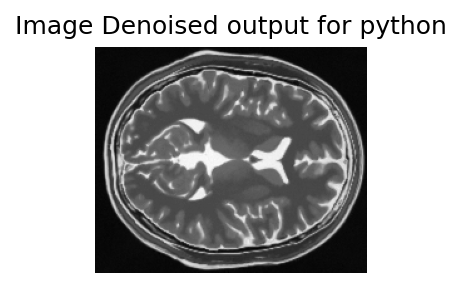

In [8]:
denoise = pythonDenoisedImage.reshape(slicesCount, imageHeight, imageWidth).T
fig = plt.figure(figsize = (3, 2), dpi = 150)
plt.axis('off')
plt.title('Image Denoised output for python')
plt.imshow(denoise[:, :, 0], cmap = 'gray')
plt.savefig('pythonImageDenoised.png')